<a href="https://colab.research.google.com/github/itzaamer/Airplane-Accident-Severity---Case-study--1/blob/main/Airplane_Accident_Severity_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import pickle
import sys
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Case study/preprocessed_data.csv")

In [ ]:
df.head()

,Accident_ID,Class,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
0,7570,1,49.223744,14.0,4.0,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
1,12128,1,62.465753,10.0,4.0,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2,2181,2,63.059361,13.0,16.0,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
3,5946,3,48.082192,11.0,9.0,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
4,9054,2,26.484018,13.0,4.0,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


- Here AccidentID is refer as the index so we can make AccidentID as our Index Column.
- or we can also drop that because it won't contain any important information.

In [ ]:
df.set_index("Accident_ID",inplace=True)

In [ ]:
df.head()

,Class,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric
Accident_ID,,,,,,,,,,,
7570,1,49.223744,14.0,4.0,71.285324,0.272118,78.04,2,31335.476824,3,0.424352
12128,1,62.465753,10.0,4.0,72.288058,0.423939,84.54,2,26024.711057,2,0.352350
2181,2,63.059361,13.0,16.0,66.362808,0.322604,78.86,7,39269.053927,3,0.003364
5946,3,48.082192,11.0,9.0,74.703737,0.337029,81.79,3,42771.499200,1,0.211728
9054,2,26.484018,13.0,4.0,47.948952,0.541140,77.16,3,35509.228515,2,0.176883


In [ ]:
df.shape

(10000, 11)

In [ ]:
df.columns

Index(['Class', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric'],
      dtype='object')

#Feature Engineering:
## a)- Statistical Operation:

- By Doing the statistical operation we can perform the feature engineering on data like mean, median , mode,standard devaition ,etc..

- Here we are using the mean to perfrom the feature engineering.

In [ ]:
df['Mean_of_Numerical_column'] = df[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].mean(axis=1)
df['Median_of_Numerical_column'] = df[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].median(axis=1)
df['Std_dev_of_Numerical_column'] = df[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].std(axis=1)
df['max_of_Numerical_column'] = df[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].max(axis=1)
df['min_of_Numerical_column'] = df[['Total_Safety_Complaints','Cabin_Temperature','Adverse_Weather_Metric','Turbulence_In_gforces','Max_Elevation','Safety_Score']].min(axis=1)

In [ ]:
df.head()

,Class,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,max_of_Numerical_column,min_of_Numerical_column
Accident_ID,,,,,,,,,,,,,,,,
7570,1,49.223744,14.0,4.0,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,5244.572840,26.611872,12781.919822,31335.476824,0.272118
12128,1,62.465753,10.0,4.0,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,4362.748850,33.232877,10612.211699,26024.711057,0.352350
2181,2,63.059361,13.0,16.0,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,6571.216543,39.529680,16018.637437,39269.053927,0.003364
5946,3,48.082192,11.0,9.0,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,7151.820025,28.541096,17450.037527,42771.499200,0.211728
9054,2,26.484018,13.0,4.0,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,5936.265093,15.242009,14487.763952,35509.228515,0.176883


In [ ]:
df.columns

Index(['Class', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric', 'Mean_of_Numerical_column',
       'Median_of_Numerical_column', 'Std_dev_of_Numerical_column',
       'max_of_Numerical_column', 'min_of_Numerical_column'],
      dtype='object')

##b)- Domain Knowledge:

- Here we are using the Domain knowledge to perfrom the Feature engineering
- Here we are converting the temprature into the kelvin 

In [ ]:
# Temperature in kelvin
df['Cabin_Temperature_kelvin'] = (df['Cabin_Temperature'] - 32) * 5/9 + 273.15

In [ ]:
df.head()

,Class,Safety_Score,Days_Since_Inspection,Total_Safety_Complaints,Control_Metric,Turbulence_In_gforces,Cabin_Temperature,Accident_Type_Code,Max_Elevation,Violations,Adverse_Weather_Metric,Mean_of_Numerical_column,Median_of_Numerical_column,Std_dev_of_Numerical_column,max_of_Numerical_column,min_of_Numerical_column,Cabin_Temperature_kelvin
Accident_ID,,,,,,,,,,,,,,,,,
7570,1,49.223744,14.0,4.0,71.285324,0.272118,78.04,2,31335.476824,3,0.424352,5244.572840,26.611872,12781.919822,31335.476824,0.272118,298.727778
12128,1,62.465753,10.0,4.0,72.288058,0.423939,84.54,2,26024.711057,2,0.352350,4362.748850,33.232877,10612.211699,26024.711057,0.352350,302.338889
2181,2,63.059361,13.0,16.0,66.362808,0.322604,78.86,7,39269.053927,3,0.003364,6571.216543,39.529680,16018.637437,39269.053927,0.003364,299.183333
5946,3,48.082192,11.0,9.0,74.703737,0.337029,81.79,3,42771.499200,1,0.211728,7151.820025,28.541096,17450.037527,42771.499200,0.211728,300.811111
9054,2,26.484018,13.0,4.0,47.948952,0.541140,77.16,3,35509.228515,2,0.176883,5936.265093,15.242009,14487.763952,35509.228515,0.176883,298.238889


<h2>1.1   Splitting the Data:

- we are splitting the data into 80:20:20 ratio here.

In [ ]:
y_true = df['Class'].values

# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, X_test, y_train, y_test = train_test_split(df, y_true, stratify=y_true, test_size=0.2,random_state=42)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2,random_state=42)

In [ ]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', X_test.shape[0])
print('Number of data points in cross validation data:', X_cv.shape[0])

Number of data points in train data: 6400
Number of data points in test data: 2000
Number of data points in cross validation data: 1600


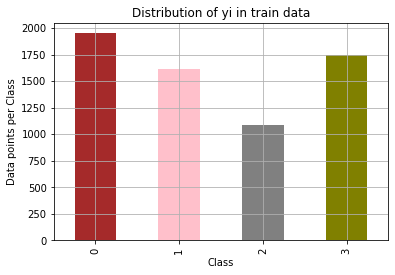

Number of data points in class 1 : 1951 ( 30.484 %)
Number of data points in class 4 : 1746 ( 27.281 %)
Number of data points in class 2 : 1618 ( 25.281 %)
Number of data points in class 3 : 1085 ( 16.953 %)
--------------------------------------------------------------------------------


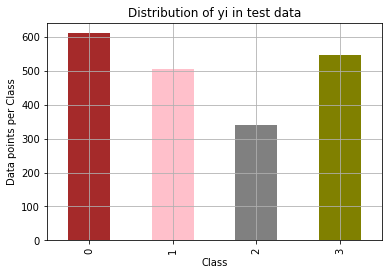

Number of data points in Class 1 : 610 ( 30.5 %)
Number of data points in Class 4 : 546 ( 27.3 %)
Number of data points in Class 2 : 505 ( 25.25 %)
Number of data points in Class 3 : 339 ( 16.95 %)
--------------------------------------------------------------------------------


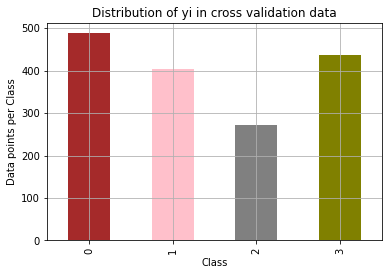

Number of data points in class 1 : 488 ( 30.5 %)
Number of data points in class 4 : 437 ( 27.312 %)
Number of data points in class 2 : 404 ( 25.25 %)
Number of data points in class 3 : 271 ( 16.938 %)


In [ ]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = X_train['Class'].value_counts().sort_index()
test_class_distribution = X_test['Class'].value_counts().sort_index()
cv_class_distribution = X_cv['Class'].value_counts().sort_index()

my_colors = ['brown', 'pink', 'gray', 'olive']
train_class_distribution.plot(kind='bar',color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

    
print('-'*80)
my_colors = ['brown', 'pink', 'gray', 'olive']
test_class_distribution.plot(kind='bar',color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in Class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)
my_colors = ['brown', 'pink', 'gray', 'olive']
cv_class_distribution.plot(kind='bar',color = my_colors)
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')


<h2>1.2 Prediction using a 'Random' Model</h2>

<p style="font-size:16px"> In a 'Random' Model, we generate the Four class probabilites randomly such that they sum to 1. </p>

In [ ]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    print("Number of misclassified points ",(len(test_y)-np.trace(C))/len(test_y)*100)
    # C = 4,4 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1,2,3]
    cmap=sns.light_palette("gray")
    # representing A in heatmap format
    print("-"*50, "Confusion matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*50, "Precision matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of columns in precision matrix",B.sum(axis=0))
    
    # representing B in heatmap format
    print("-"*50, "Recall matrix", "-"*50)
    plt.figure(figsize=(10,5))
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".2f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    print("Sum of rows in precision matrix",A.sum(axis=1))

Log loss on Cross Validation Data using Random Model 1.6459910419116845
Log loss on Test Data using Random Model 1.6436070380688637
Number of misclassified points  74.6
-------------------------------------------------- Confusion matrix --------------------------------------------------


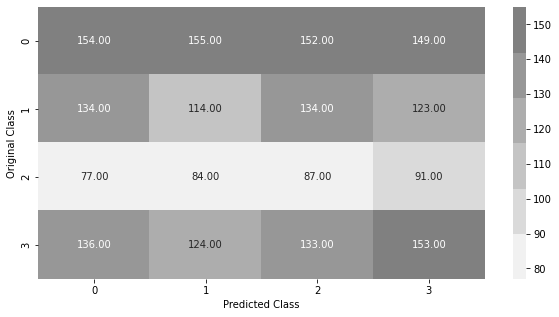

-------------------------------------------------- Precision matrix --------------------------------------------------


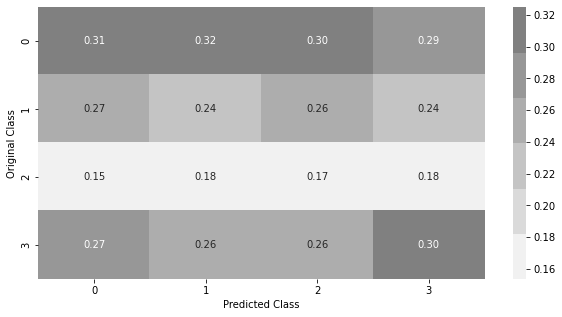

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


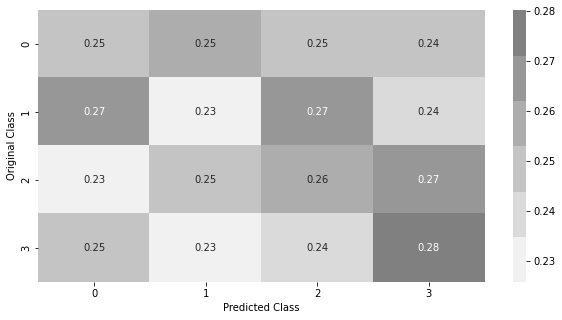

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# we need to generate 4 numbers and the sum of numbers should be 1
# one solution is to genarate 4 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039

test_data_len = X_test.shape[0]
cv_data_len = X_cv.shape[0]

# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,4))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,4)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))


# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,4))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,4)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h3>1.3 Univariate Analysis Of Categorica Variable:

<h2> Response_coding

In [ ]:
def response_values(feature, df):
    value_count = df[feature].value_counts()
    response_values_dict = dict()
    for i,j in value_count.items():
        vec = []
        for k in range(0,4):
            res_val =len( df.loc[(df['Class']==k) & (df[feature]==i)])/len( df.loc[(df[feature]==i)])
            vec.append(res_val)
            response_values_dict[i]=vec
    return response_values_dict

In [ ]:
def array_response_code(feature, df):
    response_values_dict = response_values(feature, X_train)
    value_count = X_train[feature].value_counts()
    gv_fea = []
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(response_values_dict[row[feature]])
        else:
            gv_fea.append([0.5,0.5,0.5,0.5])           
    return gv_fea

<h3>1.3.1 Univariate Analysis on Accident Type code:</h3>

---



<p style="font-size:18px;"> <b>Q1.</b> Accident Type code, What type of feature it is ?</p>
<p style="font-size:16px;"><b>Ans.</b> Accidet Type code is a categorical variable , Beacuse as we seen In the Accident Type code have less number of unique value so we can considr it as Categorical Type. </p>
<p style="font-size:18px;"> <b>Q2.</b> How many categories are there and How they are distributed?</p>

In [ ]:
unique_Accident_Type_Code = X_train['Accident_Type_Code'].value_counts()
print('Number of Unique Accident_Type_Code :', unique_Accident_Type_Code.shape[0])
# the top 10 genes that occured most
print(unique_Accident_Type_Code.head(10))

Number of Unique Accident_Type_Code : 7
4    1295
2    1171
3    1101
7     814
6     805
1     740
5     474
Name: Accident_Type_Code, dtype: int64


In [ ]:
print("Ans: There are", unique_Accident_Type_Code.shape[0] ,"different categories of Accident_Type_Code in the train data, and they are distibuted as follows",)

Ans: There are 7 different categories of Accident_Type_Code in the train data, and they are distibuted as follows


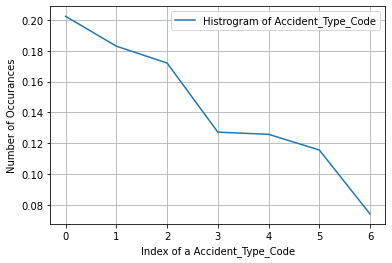

In [ ]:
s = sum(unique_Accident_Type_Code.values);
h = unique_Accident_Type_Code.values/s;
plt.plot(h, label="Histrogram of Accident_Type_Code")
plt.xlabel('Index of a Accident_Type_Code')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

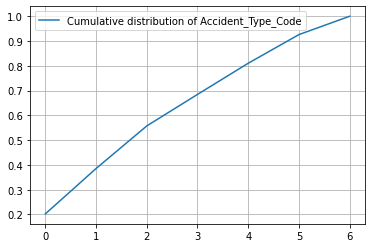

In [ ]:
c = np.cumsum(h)
plt.plot(c,label='Cumulative distribution of Accident_Type_Code')
plt.grid()
plt.legend()
plt.show()

In [ ]:
response_values('Accident_Type_Code', X_train)

{1: [0.4608108108108108,
  0.18243243243243243,
  0.22162162162162163,
  0.13513513513513514],
 2: [0.26473099914602904,
  0.5610589239965841,
  0.09564474807856532,
  0.07856532877882152],
 3: [0.17438692098092642,
  0.17620345140781107,
  0.05722070844686648,
  0.592188919164396],
 4: [0.5722007722007721,
  0.12818532818532818,
  0.1945945945945946,
  0.10501930501930502],
 5: [0.22784810126582278,
  0.4831223628691983,
  0.09915611814345991,
  0.189873417721519],
 6: [0.16024844720496895,
  0.168944099378882,
  0.08819875776397515,
  0.5826086956521739],
 7: [0.1597051597051597,
  0.12407862407862408,
  0.4619164619164619,
  0.2542997542997543]}

In [ ]:
X_train_Accident_Type_Code_res_code = array_response_code('Accident_Type_Code', X_train)
X_cv_Accident_Type_Code_res_code = array_response_code('Accident_Type_Code', X_cv)
X_test_Accident_Type_Code_res_code = array_response_code('Accident_Type_Code', X_test)

print("After response coding :")
print(np.shape(X_train_Accident_Type_Code_res_code))
print(np.shape(X_cv_Accident_Type_Code_res_code))
print(np.shape(X_test_Accident_Type_Code_res_code))

After response coding :
(6400, 4)
(1600, 4)
(2000, 4)


<p style="font-size:18px;"> <b>Q3.</b> How good is this Accident Type code feature  in predicting y_i?</p>

There are many ways to estimate how good a feature is, in predicting y_i. One of the good methods is to build a proper ML model using just this feature. In this case, we will build a logistic regression model using only Accident Type Code feature (Response encoded) to predict y_i.

For values of alpha =  1e-05 The log loss is: 1.1485479534888148
For values of alpha =  0.0001 The log loss is: 1.147732713951154
For values of alpha =  0.001 The log loss is: 1.1496650992444295
For values of alpha =  0.01 The log loss is: 1.1557306136477576
For values of alpha =  0.1 The log loss is: 1.1621287263343587
For values of alpha =  1 The log loss is: 1.1613597077877447


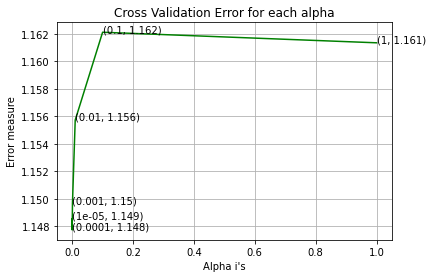

For values of best alpha =  0.0001 The train log loss is: 1.1583942238083857
For values of best alpha =  0.0001 The cross validation log loss is: 1.147732713951154
For values of best alpha =  0.0001 The test log loss is: 1.1557392152319785


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_Accident_Type_Code_res_code, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_Accident_Type_Code_res_code, y_train)
    predict_y = sig_clf.predict_proba(X_cv_Accident_Type_Code_res_code)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_Accident_Type_Code_res_code, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_Accident_Type_Code_res_code, y_train)

predict_y = sig_clf.predict_proba(X_train_Accident_Type_Code_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_Accident_Type_Code_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_Accident_Type_Code_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q4.</b> Is the Accident_Type_Code feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error. </p>

<h3>1.3.2 Univariate Analysis on Days Since Inspection Feature</h3>

<p style="font-size:18px;"> <b>Q5.</b> Days Since Inspection, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Days Since Inspection is a categorical variable </p>
<p style="font-size:18px;"> <b>Q6.</b> How many categories are there?</p>

In [ ]:
unique_Days_Since_Inspection = X_train['Days_Since_Inspection'].value_counts()
print('Number of Unique Days_Since_Inspection :', unique_Days_Since_Inspection.shape[0])
# the top 10 variations that occured most
print(unique_Days_Since_Inspection.head(10))

Number of Unique Days_Since_Inspection : 15
13.0    876
14.0    677
15.0    668
11.0    656
12.0    641
16.0    485
10.0    464
17.0    389
9.0     337
8.0     326
Name: Days_Since_Inspection, dtype: int64


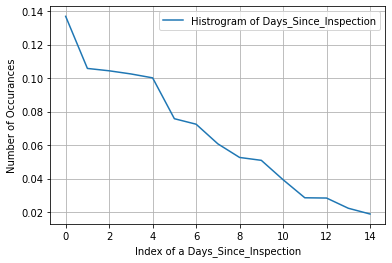

In [ ]:
s = sum(unique_Days_Since_Inspection.values);
h = unique_Days_Since_Inspection.values/s;
plt.plot(h, label="Histrogram of Days_Since_Inspection")
plt.xlabel('Index of a Days_Since_Inspection')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.136875   0.24265625 0.34703125 0.44953125 0.5496875  0.62546875
 0.69796875 0.75875    0.81140625 0.86234375 0.90171875 0.9303125
 0.95875    0.98109375 1.        ]


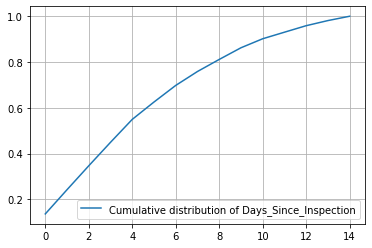

In [ ]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Days_Since_Inspection')
plt.grid()
plt.legend()
plt.show()

In [ ]:
response_values('Days_Since_Inspection', X_train)

{6.0: [0.21487603305785125,
  0.38016528925619836,
  0.049586776859504134,
  0.35537190082644626],
 7.0: [0.4644808743169399,
  0.2677595628415301,
  0.12021857923497267,
  0.14754098360655737],
 8.0: [0.35276073619631904,
  0.1441717791411043,
  0.15030674846625766,
  0.35276073619631904],
 9.0: [0.3353115727002967,
  0.19881305637982197,
  0.1543026706231454,
  0.3115727002967359],
 10.0: [0.2823275862068966,
  0.2435344827586207,
  0.2025862068965517,
  0.27155172413793105],
 11.0: [0.31402439024390244,
  0.24847560975609756,
  0.16158536585365854,
  0.2759146341463415],
 12.0: [0.31513260530421217,
  0.2839313572542902,
  0.14508580343213728,
  0.25585023400936036],
 13.0: [0.3105022831050228,
  0.22945205479452055,
  0.18036529680365296,
  0.2796803652968037],
 14.0: [0.2821270310192024,
  0.2038404726735598,
  0.21861152141802068,
  0.29542097488921715],
 15.0: [0.2679640718562874,
  0.3248502994011976,
  0.16467065868263472,
  0.24251497005988024],
 16.0: [0.36907216494845363,
 

In [ ]:
X_train_Days_Since_Inspection_res_code = array_response_code('Days_Since_Inspection', X_train)
X_cv_Days_Since_Inspection_res_code = array_response_code('Days_Since_Inspection', X_cv)
X_test_Days_Since_Inspection_res_code = array_response_code('Days_Since_Inspection', X_test)

print("After response coding :")
print(np.shape(X_train_Days_Since_Inspection_res_code))
print(np.shape(X_cv_Days_Since_Inspection_res_code))
print(np.shape(X_test_Days_Since_Inspection_res_code))

After response coding :
(6400, 4)
(1600, 4)
(2000, 4)


<p style="font-size:18px;"> <b>Q7.</b> How good is this Days_Since_Inspection feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.3588435450938312
For values of alpha =  0.0001 The log loss is: 1.3589265004997457
For values of alpha =  0.001 The log loss is: 1.3588643951850812
For values of alpha =  0.01 The log loss is: 1.3588504191162312
For values of alpha =  0.1 The log loss is: 1.3588119882354985
For values of alpha =  1 The log loss is: 1.3601544228290274


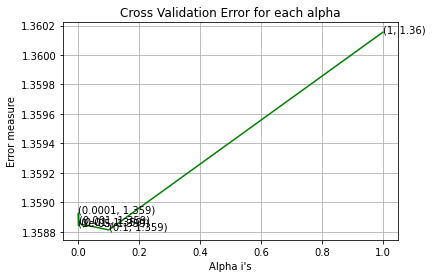

For values of best alpha =  0.1 The train log loss is: 1.351537690646103
For values of best alpha =  0.1 The cross validation log loss is: 1.3588119882354985
For values of best alpha =  0.1 The test log loss is: 1.3570577250360465


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_Days_Since_Inspection_res_code, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_Days_Since_Inspection_res_code, y_train)
    predict_y = sig_clf.predict_proba(X_cv_Days_Since_Inspection_res_code)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_Days_Since_Inspection_res_code, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_Days_Since_Inspection_res_code, y_train)

predict_y = sig_clf.predict_proba(X_train_Days_Since_Inspection_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_Days_Since_Inspection_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_Days_Since_Inspection_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<p style="font-size:18px;"> <b>Q8.</b> Is the Days_Since_Inspection feature stable across all the data sets (Test, Train, Cross validation)?</p>
<p style="font-size:16px;"> <b>Ans.</b> Yes beacuse there is not big differnce in the test,cv and train. </p>

<h3>1.3.3 Univariate Analysis on Violations</h3>

<p style="font-size:18px;"> <b>Q9.</b> Violations, What type of feature is it ?</p>
<p style="font-size:16px;"><b>Ans.</b> Violations is a categorical variable </p>
<p style="font-size:18px;"> <b>Q10.</b> How many categories are there?</p>

In [ ]:
unique_Violations = X_train['Violations'].value_counts()
print('Number of Unique Violations :', unique_Violations.shape[0])
# the top 10 variations that occured most
print(unique_Violations.head(10))

Number of Unique Violations : 6
2    2425
1    1535
3    1530
0     453
4     416
5      41
Name: Violations, dtype: int64


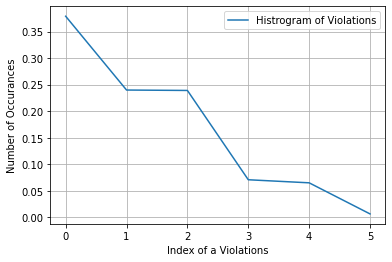

In [ ]:
s = sum(unique_Violations.values);
h = unique_Violations.values/s;
plt.plot(h, label="Histrogram of Violations")
plt.xlabel('Index of a Violations')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.37890625 0.61875    0.8578125  0.92859375 0.99359375 1.        ]


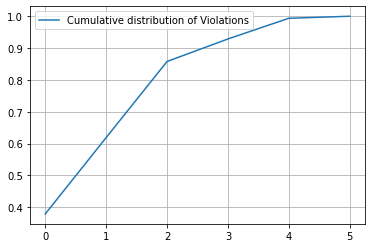

In [ ]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Violations')
plt.grid()
plt.legend()
plt.show()

In [ ]:
response_values('Violations', X_train)

{0: [0.32891832229580575,
  0.25386313465783666,
  0.1346578366445916,
  0.282560706401766],
 1: [0.2990228013029316,
  0.28273615635179156,
  0.15765472312703582,
  0.26058631921824105],
 2: [0.31752577319587627,
  0.23917525773195877,
  0.15670103092783505,
  0.2865979381443299],
 3: [0.28888888888888886,
  0.24836601307189543,
  0.1934640522875817,
  0.269281045751634],
 4: [0.29086538461538464, 0.24519230769230768, 0.21875, 0.24519230769230768],
 5: [0.24390243902439024,
  0.17073170731707318,
  0.36585365853658536,
  0.21951219512195122]}

In [ ]:
X_train_Violations_res_code = array_response_code('Violations', X_train)
X_cv_Violations_res_code = array_response_code('Violations', X_cv)
X_test_Violations_res_code = array_response_code('Violations', X_test)

print("After response coding :")
print(np.shape(X_train_Violations_res_code))
print(np.shape(X_cv_Violations_res_code))
print(np.shape(X_test_Violations_res_code))

After response coding :
(6400, 4)
(1600, 4)
(2000, 4)


<p style="font-size:18px;"> <b>Q11.</b> How good is this Violations feature  in predicting y_i?</p>

Let's build a model just like the earlier!

For values of alpha =  1e-05 The log loss is: 1.359867273493278
For values of alpha =  0.0001 The log loss is: 1.35976651425515
For values of alpha =  0.001 The log loss is: 1.3597066359578258
For values of alpha =  0.01 The log loss is: 1.3596733854575205
For values of alpha =  0.1 The log loss is: 1.3595978133570208
For values of alpha =  1 The log loss is: 1.3599255737828897


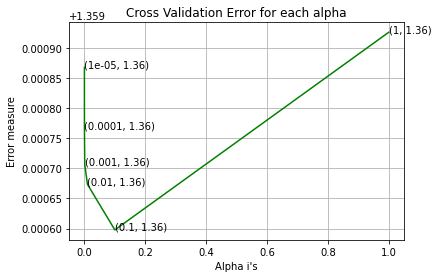

For values of best alpha =  0.1 The train log loss is: 1.3619124826035012
For values of best alpha =  0.1 The cross validation log loss is: 1.3595978133570208
For values of best alpha =  0.1 The test log loss is: 1.3633951855661672


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train_Violations_res_code, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_Violations_res_code, y_train)
    predict_y = sig_clf.predict_proba(X_cv_Violations_res_code)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train_Violations_res_code, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_Violations_res_code, y_train)

predict_y = sig_clf.predict_proba(X_train_Violations_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_Violations_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_Violations_res_code)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>Vectorizations of Numerical Feature:

- Cabin Temprature.
- Max Elevations.
- Turbulance GForce.
- Adverse_Weather_Metric
- Control Metric
- Safety Score
- Total Safety Complaint
- Mean Of Numerical Column
- Median of Numerical Column
- Std Dev of Numerical Column
- Max Of Numerical Column
- Min Of Numerical Column
- Cabin Temprature Kelvin

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
train_standardScaler_Cabin_Temprature = scalar.fit_transform(X_train['Cabin_Temperature'].values.reshape(-1,1))
cv_standardScaler_Cabin_Temprature = scalar.transform(X_cv['Cabin_Temperature'].values.reshape(-1,1))
test_standardScaler_Cabin_Temprature = scalar.transform(X_test['Cabin_Temperature'].values.reshape(-1,1))
print(train_standardScaler_Cabin_Temprature.shape)
print(cv_standardScaler_Cabin_Temprature.shape)
print(test_standardScaler_Cabin_Temprature.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Second Numerical feature - 'Max_Elevation'

scalar = StandardScaler()
train_standardScaler_Max_Elevation = scalar.fit_transform(X_train['Max_Elevation'].values.reshape(-1,1))
cv_standardScaler_Max_Elevation = scalar.transform(X_cv['Max_Elevation'].values.reshape(-1,1))
test_standardScaler_Max_Elevation = scalar.transform(X_test['Max_Elevation'].values.reshape(-1,1))
print(train_standardScaler_Max_Elevation.shape)
print(cv_standardScaler_Max_Elevation.shape)
print(test_standardScaler_Max_Elevation.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Turbulence_In_gforces'

scalar = StandardScaler()
train_standardScaler_Turbulence_In_gforces = scalar.fit_transform(X_train['Turbulence_In_gforces'].values.reshape(-1,1))
cv_standardScaler_Turbulence_In_gforces = scalar.transform(X_cv['Turbulence_In_gforces'].values.reshape(-1,1))
test_standardScaler_Turbulence_In_gforces = scalar.transform(X_test['Turbulence_In_gforces'].values.reshape(-1,1))
print(train_standardScaler_Turbulence_In_gforces.shape)
print(cv_standardScaler_Turbulence_In_gforces.shape)
print(test_standardScaler_Turbulence_In_gforces.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Adverse_Weather_Metric'

scalar = StandardScaler()
train_standardScaler_Adverse_Weather_Metric = scalar.fit_transform(X_train['Adverse_Weather_Metric'].values.reshape(-1,1))
cv_standardScaler_Adverse_Weather_Metric = scalar.transform(X_cv['Adverse_Weather_Metric'].values.reshape(-1,1))
test_standardScaler_Adverse_Weather_Metric = scalar.transform(X_test['Adverse_Weather_Metric'].values.reshape(-1,1))
print(train_standardScaler_Adverse_Weather_Metric.shape)
print(cv_standardScaler_Adverse_Weather_Metric.shape)
print(test_standardScaler_Adverse_Weather_Metric.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Control_Metric'

scalar = StandardScaler()
train_standardScaler_Control_Metric = scalar.fit_transform(X_train['Control_Metric'].values.reshape(-1,1))
cv_standardScaler_Control_Metric = scalar.transform(X_cv['Control_Metric'].values.reshape(-1,1))
test_standardScaler_Control_Metric = scalar.transform(X_test['Control_Metric'].values.reshape(-1,1))
print(train_standardScaler_Control_Metric.shape)
print(cv_standardScaler_Control_Metric.shape)
print(test_standardScaler_Control_Metric.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Safety_Score'

scalar = StandardScaler()
train_standardScaler_Safety_Score = scalar.fit_transform(X_train['Safety_Score'].values.reshape(-1,1))
cv_standardScaler_Safety_Score = scalar.transform(X_cv['Safety_Score'].values.reshape(-1,1))
test_standardScaler_Safety_Score = scalar.transform(X_test['Safety_Score'].values.reshape(-1,1))
print(train_standardScaler_Safety_Score.shape)
print(cv_standardScaler_Safety_Score.shape)
print(test_standardScaler_Safety_Score.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Total_Safety_Complaints'

scalar = StandardScaler()
train_standardScaler_Total_Safety_Complaints = scalar.fit_transform(X_train['Total_Safety_Complaints'].values.reshape(-1,1))
cv_standardScaler_Total_Safety_Complaints = scalar.transform(X_cv['Total_Safety_Complaints'].values.reshape(-1,1))
test_standardScaler_Total_Safety_Complaints = scalar.transform(X_test['Total_Safety_Complaints'].values.reshape(-1,1))
print(train_standardScaler_Total_Safety_Complaints.shape)
print(cv_standardScaler_Total_Safety_Complaints.shape)
print(test_standardScaler_Total_Safety_Complaints.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Mean_of_Numerical_column'

scalar = StandardScaler()
train_standardScaler_Mean_of_Numerical_column = scalar.fit_transform(X_train['Mean_of_Numerical_column'].values.reshape(-1,1))
cv_standardScaler_Mean_of_Numerical_column = scalar.transform(X_cv['Mean_of_Numerical_column'].values.reshape(-1,1))
test_standardScaler_Mean_of_Numerical_column = scalar.transform(X_test['Mean_of_Numerical_column'].values.reshape(-1,1))
print(train_standardScaler_Mean_of_Numerical_column.shape)
print(cv_standardScaler_Mean_of_Numerical_column.shape)
print(test_standardScaler_Mean_of_Numerical_column.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Median_of_Numerical_column'

scalar = StandardScaler()
train_standardScaler_Median_of_Numerical_column = scalar.fit_transform(X_train['Median_of_Numerical_column'].values.reshape(-1,1))
cv_standardScaler_Median_of_Numerical_column = scalar.transform(X_cv['Median_of_Numerical_column'].values.reshape(-1,1))
test_standardScaler_Median_of_Numerical_column = scalar.transform(X_test['Median_of_Numerical_column'].values.reshape(-1,1))
print(train_standardScaler_Median_of_Numerical_column.shape)
print(cv_standardScaler_Median_of_Numerical_column.shape)
print(test_standardScaler_Median_of_Numerical_column.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Std_dev_of_Numerical_column'

scalar = StandardScaler()
train_standardScaler_Std_dev_of_Numerical_column = scalar.fit_transform(X_train['Std_dev_of_Numerical_column'].values.reshape(-1,1))
cv_standardScaler_Std_dev_of_Numerical_column = scalar.transform(X_cv['Std_dev_of_Numerical_column'].values.reshape(-1,1))
test_standardScaler_Std_dev_of_Numerical_column = scalar.transform(X_test['Std_dev_of_Numerical_column'].values.reshape(-1,1))
print(train_standardScaler_Std_dev_of_Numerical_column.shape)
print(cv_standardScaler_Std_dev_of_Numerical_column.shape)
print(test_standardScaler_Std_dev_of_Numerical_column.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'max_of_Numerical_column'

scalar = StandardScaler()
train_standardScaler_max_of_Numerical_column = scalar.fit_transform(X_train['max_of_Numerical_column'].values.reshape(-1,1))
cv_standardScaler_max_of_Numerical_column = scalar.transform(X_cv['max_of_Numerical_column'].values.reshape(-1,1))
test_standardScaler_max_of_Numerical_column = scalar.transform(X_test['max_of_Numerical_column'].values.reshape(-1,1))
print(train_standardScaler_max_of_Numerical_column.shape)
print(cv_standardScaler_max_of_Numerical_column.shape)
print(test_standardScaler_max_of_Numerical_column.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'min_of_Numerical_column'

scalar = StandardScaler()
train_standardScaler_min_of_Numerical_column = scalar.fit_transform(X_train['min_of_Numerical_column'].values.reshape(-1,1))
cv_standardScaler_min_of_Numerical_column = scalar.transform(X_cv['min_of_Numerical_column'].values.reshape(-1,1))
test_standardScaler_min_of_Numerical_column = scalar.transform(X_test['min_of_Numerical_column'].values.reshape(-1,1))
print(train_standardScaler_min_of_Numerical_column.shape)
print(cv_standardScaler_min_of_Numerical_column.shape)
print(test_standardScaler_min_of_Numerical_column.shape)

(6400, 1)
(1600, 1)
(2000, 1)


In [ ]:
from sklearn.preprocessing import StandardScaler
# Next Numerical feature - 'Cabin_Temperature_kelvin'

scalar = StandardScaler()
train_standardScaler_Cabin_Temperature_kelvin = scalar.fit_transform(X_train['Cabin_Temperature_kelvin'].values.reshape(-1,1))
cv_standardScaler_Cabin_Temperature_kelvin = scalar.transform(X_cv['Cabin_Temperature_kelvin'].values.reshape(-1,1))
test_standardScaler_Cabin_Temperature_kelvin = scalar.transform(X_test['Cabin_Temperature_kelvin'].values.reshape(-1,1))
print(train_standardScaler_Cabin_Temperature_kelvin.shape)
print(cv_standardScaler_Cabin_Temperature_kelvin.shape)
print(test_standardScaler_Cabin_Temperature_kelvin.shape)

(6400, 1)
(1600, 1)
(2000, 1)


#Merging all categorical, numerical vectors:

In [ ]:
from scipy.sparse import hstack
X_train_hstacked_all_features_vectorized = np.hstack((train_standardScaler_Cabin_Temperature_kelvin, train_standardScaler_min_of_Numerical_column, train_standardScaler_max_of_Numerical_column, train_standardScaler_Std_dev_of_Numerical_column, train_standardScaler_Median_of_Numerical_column, train_standardScaler_Mean_of_Numerical_column, 
train_standardScaler_Total_Safety_Complaints, train_standardScaler_Safety_Score,train_standardScaler_Cabin_Temprature,train_standardScaler_Adverse_Weather_Metric,train_standardScaler_Max_Elevation,train_standardScaler_Turbulence_In_gforces,train_standardScaler_Control_Metric,
X_train_Violations_res_code,X_train_Days_Since_Inspection_res_code,X_train_Accident_Type_Code_res_code))

print('X_train_hstacked_all_features_vectorized.shape is ', X_train_hstacked_all_features_vectorized.shape)

X_cv_hstacked_all_features_vectorized = np.hstack((cv_standardScaler_Cabin_Temperature_kelvin, cv_standardScaler_min_of_Numerical_column, cv_standardScaler_max_of_Numerical_column, cv_standardScaler_Std_dev_of_Numerical_column, cv_standardScaler_Median_of_Numerical_column, cv_standardScaler_Mean_of_Numerical_column, 
cv_standardScaler_Total_Safety_Complaints,cv_standardScaler_Safety_Score,cv_standardScaler_Cabin_Temprature,cv_standardScaler_Adverse_Weather_Metric,cv_standardScaler_Max_Elevation,cv_standardScaler_Turbulence_In_gforces,cv_standardScaler_Control_Metric,
X_cv_Violations_res_code,X_cv_Days_Since_Inspection_res_code,X_cv_Accident_Type_Code_res_code))

print('X_cv_hstacked_all_features_vectorized.shape is ', X_cv_hstacked_all_features_vectorized.shape)

test_hstacked_all_features_vectorized = np.hstack((test_standardScaler_Cabin_Temperature_kelvin, test_standardScaler_min_of_Numerical_column, test_standardScaler_max_of_Numerical_column, test_standardScaler_Std_dev_of_Numerical_column, test_standardScaler_Median_of_Numerical_column, test_standardScaler_Mean_of_Numerical_column,
test_standardScaler_Total_Safety_Complaints, test_standardScaler_Safety_Score,test_standardScaler_Cabin_Temprature,test_standardScaler_Adverse_Weather_Metric,test_standardScaler_Max_Elevation,test_standardScaler_Turbulence_In_gforces,test_standardScaler_Control_Metric,
X_test_Violations_res_code,X_test_Days_Since_Inspection_res_code,X_test_Accident_Type_Code_res_code))

print('test_hstacked_all_features_vectorized.shape is ', test_hstacked_all_features_vectorized.shape)

NameError: ignored

<h1> Machine Learning Models</h1>

<h3>1. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 1.305317260507854
log_loss for k =  3 is 1.2575948483197723
log_loss for k =  5 is 1.2076119014300906
log_loss for k =  7 is 1.1988897861028216
log_loss for k =  9 is 1.1908296798128841
log_loss for k =  11 is 1.184264068931589
log_loss for k =  13 is 1.181247209985897


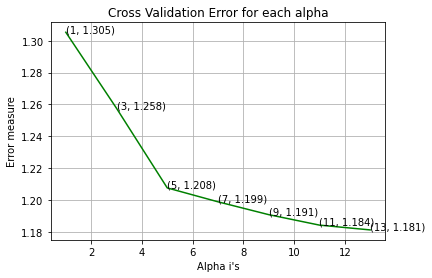

For values of best alpha =  13 The train log loss is: 1.097523259337422
For values of best alpha =  13 The cross validation log loss is: 1.181247209985897
For values of best alpha =  13 The test log loss is: 1.1430100911993635
Number of misclassified points  44.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


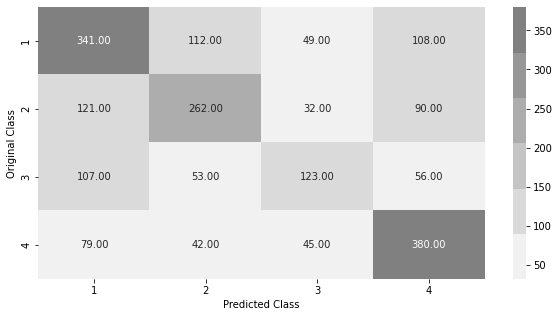

-------------------------------------------------- Precision matrix --------------------------------------------------


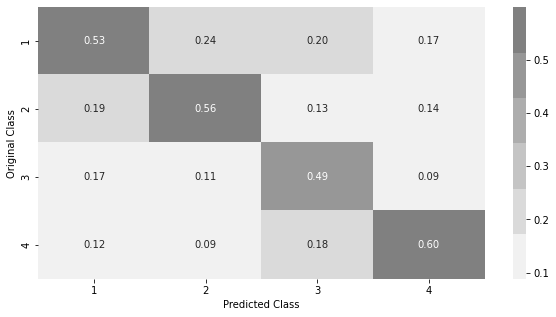

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


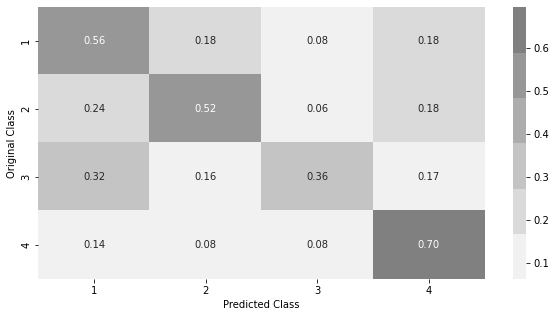

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    
predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of KNN model:

- Here we train our knn model on Response Coding + standard scaling, and we know knn model wokr well on the low dimensional data point as we seen above we get it work well.
- We use here knn model and calibrated model 
- knn use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- Here we do Cross validation to find the best hyperparameter(k).And best K = 13 where train loss = 1.097 and cv loss = 1.181 and test loss = 1.143 
-  The missclassification point here 44.7%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix , we see it work well in the class 3 it won't give the good matrix.
- In precision , it work well.
- In recall it also work well. 


<h3>2. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.1721146123528416
log_loss for c =  0.0001 is 1.1720941748828866
log_loss for c =  0.001 is 1.1719135764304534
log_loss for c =  0.01 is 1.1709160637670544
log_loss for c =  0.1 is 1.1692227296366169
log_loss for c =  1 is 1.1692610901677474
log_loss for c =  10 is 1.1710095444421542
log_loss for c =  100 is 1.1714598171427977
log_loss for c =  1000 is 1.1714891232217601


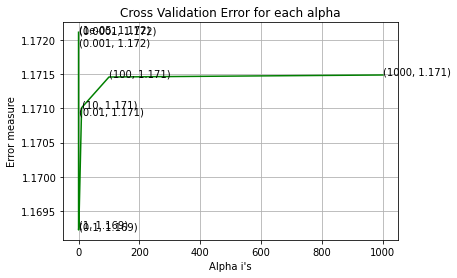

log loss for train data 1.1522946097317965
log loss for cv data 1.1692227296366169
log loss for test data 1.1344295743695865
Number of misclassified points  43.35
-------------------------------------------------- Confusion matrix --------------------------------------------------


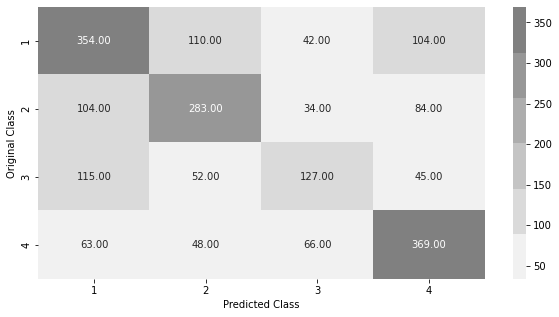

-------------------------------------------------- Precision matrix --------------------------------------------------


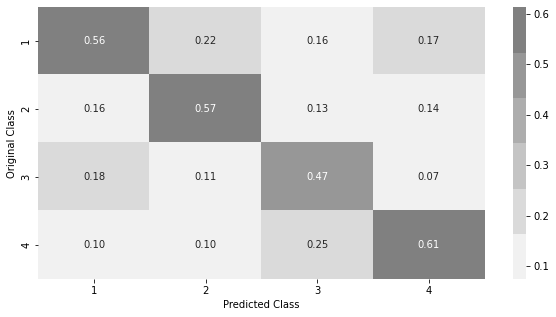

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


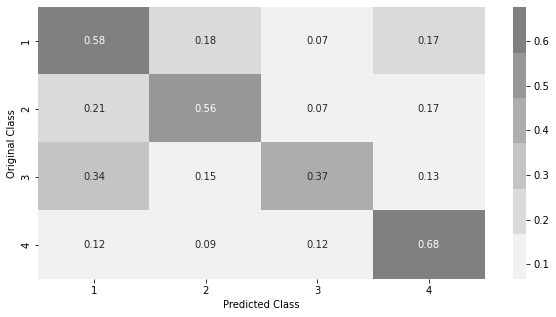

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
pred_y=sig_clf.predict(test_hstacked_all_features_vectorized)

predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of Logistic model:

- Here we train our Logistic model on Response Coding + standard scaling.
- We use here Logistic model and calibrated model 
- Logistic use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- Here best hyperparamter is c =0.1
- Here our model give the  train loss = 1.152 and cv loss = 1.169 and test loss = 1.134 
-  The missclassification point here 43.35%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix , we see it work well in the class 3 it won't give the good matrix.
- In precision , it work well.
- In recall it also work well. 


<h3> 3. Random Forest Classifier </h3>

log_loss for c =  10 is 1.1924103012525158
log_loss for c =  50 is 1.1907515490483482
log_loss for c =  100 is 1.1903421491029667
log_loss for c =  500 is 1.189623300183478
log_loss for c =  1000 is 1.1896812267772312
log_loss for c =  2000 is 1.1897170875809353
log_loss for c =  3000 is 1.1898405198262738


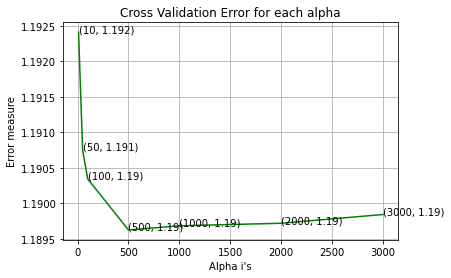

For values of best alpha =  500 The train log loss is: 1.0745161125505682
For values of best alpha =  500 The cross validation log loss is: 1.189623300183478
For values of best alpha =  500 The test log loss is: 1.1638708175796681
Number of misclassified points  46.300000000000004
-------------------------------------------------- Confusion matrix --------------------------------------------------


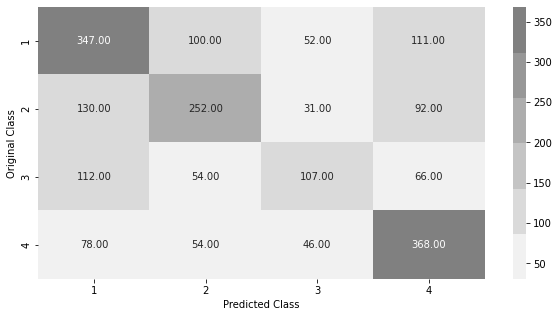

-------------------------------------------------- Precision matrix --------------------------------------------------


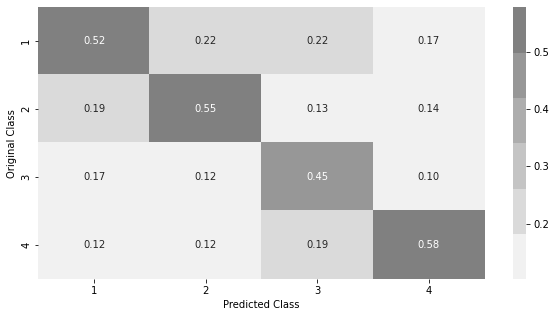

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


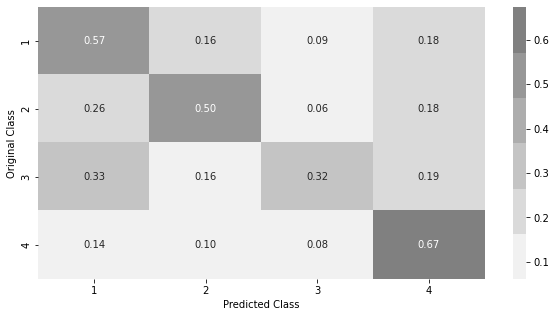

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)

predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of Random Forest model:

- Here we train our Random Forest model on Response Coding + standard scaling.
- We use here Random forest model and calibrated model 
- Random use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- In the Random Forest here are number of hyperparameter but we only consider no_tree here which denoted by alpha and the best hyperparamter we get is alpha =500.
- Here our model give the  train loss = 1.074 and cv loss = 1.189 and test loss = 1.163 
-  The missclassification point here 46.30%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix , we see it work well in the class 3 it won't give the good matrix.
- In precision , it work well.
- In recall it also work well. 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

<h3>4. XgBoost Classification</h3>

In [ ]:
pip install xgboost --upgrade

     |████████████████████████████████| 173.6 MB 8.5 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


log_loss for c =  10 is 1.1635510986330124
log_loss for c =  50 is 1.1774245114889956
log_loss for c =  100 is 1.1855535908727215
log_loss for c =  500 is 1.194568949495734
log_loss for c =  1000 is 1.1960087854331594
log_loss for c =  2000 is 1.196946627232273


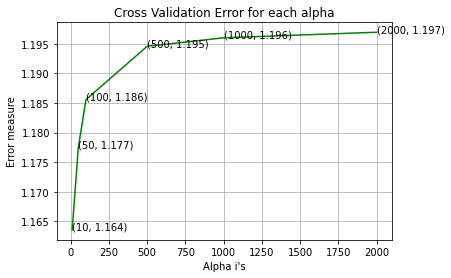

For values of best alpha =  10 The train log loss is: 1.0945085028623427
For values of best alpha =  10 The cross validation log loss is: 1.1635510986330124
For values of best alpha =  10 The test log loss is: 1.1166017467355778
Number of misclassified points  43.0
-------------------------------------------------- Confusion matrix --------------------------------------------------


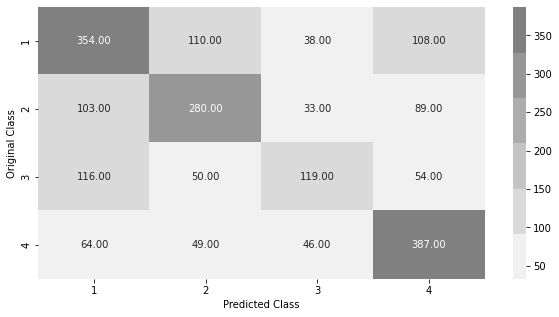

-------------------------------------------------- Precision matrix --------------------------------------------------


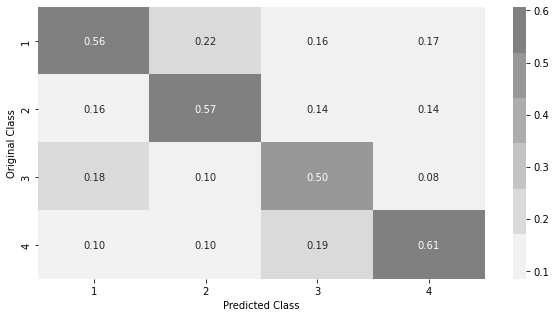

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


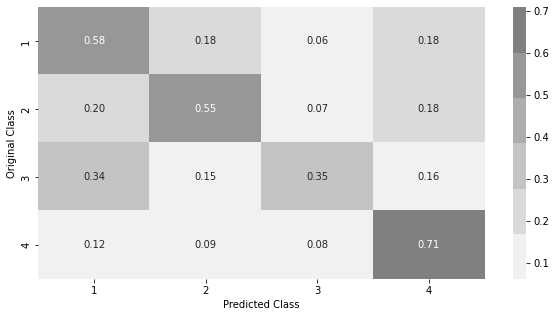

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

import xgboost as xgb
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,eval_metric='mlogloss')
    x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1,eval_metric='mlogloss')
x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    
predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of XGboost model:

- Here we train our XGboost model on Response Coding + standard scaling.
- We use here XGboost model and calibrated model 
- XGboost use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- In the XGboost we have the n_estimator is the hyperparameter there are many hyperparameter in xgboost but we consider only n_estimaator here and the best hyperparamter we get is alpha =10.
- Here our model give the  train loss = 1.094 and cv loss = 1.163 and test loss = 1.116 
-  The missclassification point here 43.00%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix , we see it work well in the class 3 it won't give the good matrix.
- In precision , it work well.
- In recall it also work well.

<h3>4.1 XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier()
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train_hstacked_all_features_vectorized,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[09:57:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [ ]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.1}


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=100, learning_rate=0.15, colsample_bytree=0.1, max_depth=5,eval_metric='mlogloss')
x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)

predict_y = c_cfl.predict_proba(X_train_hstacked_all_features_vectorized)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv_hstacked_all_features_vectorized)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(test_hstacked_all_features_vectorized)
print ('test loss',log_loss(y_test, predict_y))

train loss 1.3673590491840861
cv loss 1.3657999921600135
test loss 1.3657063256172048


<h2> Obervation Of Best Hyperparameter Xgboost Model:

- In Xgboost we have number of hyperparameter so we do Hyperparameter tuning for them in this model.
- We train our model on response coding and Standard scaling.
- We train Xgboost model with best hyperparameter and the result we get is Train Loss = 1.367 , cv loss = 1.365 ,test loss = 1.365.

<h2> Observation:

- As we seen above conclusion we see that Xgboost performing very well on the Cv and test dataset and it misclassification point is also less as comapre to other it beacuse data set is might be not linearly sepeprable.
- In term of train dataset we see random forest perform very good as compare to other. 


<h3>Selection Of model:

 So in term of selection of model we Can select Xgboost beacuse it give us best results and perfromance.

<h2>    2.   One Hot Encoding:

- Now dealing The categorical Data With One Hot Encoding.

<h3>2.1 Accident Type code:

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# one-hot encoding of Accident_Type_Code feature.
encoder = OneHotEncoder(handle_unknown='ignore')
train_Accident_Type_Code_onehotCoding = encoder.fit_transform(X_train['Accident_Type_Code'].values.reshape(-1,1))
cv_Accident_Type_Code_onehotCoding = encoder.transform(X_cv['Accident_Type_Code'].values.reshape(-1,1))
test_Accident_Type_Code_onehotCoding = encoder.transform(X_test['Accident_Type_Code'].values.reshape(-1,1))
print(train_Accident_Type_Code_onehotCoding.shape)
print(cv_Accident_Type_Code_onehotCoding.shape)
print(test_Accident_Type_Code_onehotCoding.shape)

(6400, 7)
(1600, 7)
(2000, 7)


In [ ]:
X_train['Accident_Type_Code'].head()

Accident_ID
3062     3
10631    6
5457     2
2425     1
2287     4
Name: Accident_Type_Code, dtype: int64

In [ ]:
encoder.get_feature_names()

array(['x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7'],
      dtype=object)

In [ ]:
print("train_Accident_Type_Code_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_Accident_Type_Code_onehotCoding.shape)

train_Accident_Type_Code_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (6400, 7)


For values of alpha =  1e-05 The log loss is: 1.1595083605514203
For values of alpha =  0.0001 The log loss is: 1.1475390303226853
For values of alpha =  0.001 The log loss is: 1.1466341553887642
For values of alpha =  0.01 The log loss is: 1.1466664858128304
For values of alpha =  0.1 The log loss is: 1.152499971340862
For values of alpha =  1 The log loss is: 1.158323368593657


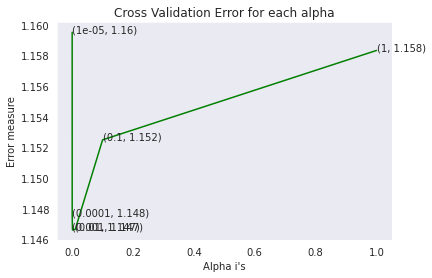

For values of best alpha =  0.001 The train log loss is: 1.1577897211789567
For values of best alpha =  0.001 The cross validation log loss is: 1.1466341553887642
For values of best alpha =  0.001 The test log loss is: 1.1553303825868466


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_Accident_Type_Code_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_Accident_Type_Code_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_Accident_Type_Code_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_Accident_Type_Code_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_Accident_Type_Code_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_Accident_Type_Code_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_Accident_Type_Code_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_Accident_Type_Code_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>2.2 Days Since Inspections

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# one-hot encoding of Days_Since_Inspection feature.
encoder1 = OneHotEncoder(handle_unknown='ignore')
train_Days_Since_Inspection_onehotCoding = encoder1.fit_transform(X_train['Days_Since_Inspection'].values.reshape(-1,1))
cv_Days_Since_Inspection_onehotCoding = encoder1.transform(X_cv['Days_Since_Inspection'].values.reshape(-1,1))
test_Days_Since_Inspection_onehotCoding = encoder1.transform(X_test['Days_Since_Inspection'].values.reshape(-1,1))
print(train_Days_Since_Inspection_onehotCoding.shape)
print(cv_Days_Since_Inspection_onehotCoding.shape)
print(test_Days_Since_Inspection_onehotCoding.shape)

(6400, 15)
(1600, 15)
(2000, 15)


In [ ]:
X_train['Days_Since_Inspection'].head()

Accident_ID
3062     16.0
10631    14.0
5457     12.0
2425     13.0
2287     14.0
Name: Days_Since_Inspection, dtype: float64

In [ ]:
encoder1.get_feature_names()

array(['x0_6.0', 'x0_7.0', 'x0_8.0', 'x0_9.0', 'x0_10.0', 'x0_11.0',
       'x0_12.0', 'x0_13.0', 'x0_14.0', 'x0_15.0', 'x0_16.0', 'x0_17.0',
       'x0_18.0', 'x0_19.0', 'x0_20.0'], dtype=object)

In [ ]:
print("train_Days_Since_Inspection_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_Days_Since_Inspection_onehotCoding.shape)

train_Days_Since_Inspection_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (6400, 15)


For values of alpha =  1e-05 The log loss is: 1.3609970057682699
For values of alpha =  0.0001 The log loss is: 1.3572639515509377
For values of alpha =  0.001 The log loss is: 1.358506919137446
For values of alpha =  0.01 The log loss is: 1.358852249792145
For values of alpha =  0.1 The log loss is: 1.3618526212490587
For values of alpha =  1 The log loss is: 1.3626826334570825


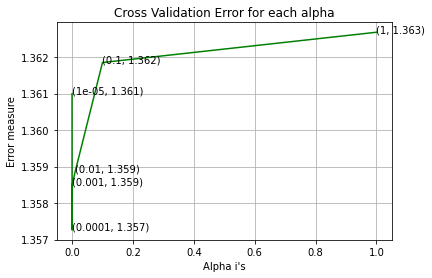

For values of best alpha =  0.0001 The train log loss is: 1.3536794103875645
For values of best alpha =  0.0001 The cross validation log loss is: 1.3572639515509377
For values of best alpha =  0.0001 The test log loss is: 1.3591754338321425


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_Days_Since_Inspection_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_Days_Since_Inspection_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_Days_Since_Inspection_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_Days_Since_Inspection_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_Days_Since_Inspection_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_Days_Since_Inspection_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_Days_Since_Inspection_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_Days_Since_Inspection_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


<h3>2.3 Violations

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# one-hot encoding of Violations feature.
encoder2 = OneHotEncoder(handle_unknown='ignore')
train_Violations_onehotCoding = encoder2.fit_transform(X_train['Violations'].values.reshape(-1,1))
cv_Violations_onehotCoding = encoder2.transform(X_cv['Violations'].values.reshape(-1,1))
test_Violations_onehotCoding = encoder2.transform(X_test['Violations'].values.reshape(-1,1))
print(train_Violations_onehotCoding.shape)
print(cv_Violations_onehotCoding.shape)
print(test_Violations_onehotCoding.shape)

(6400, 6)
(1600, 6)
(2000, 6)


In [ ]:
X_train['Violations'].head()

Accident_ID
3062     2
10631    1
5457     4
2425     2
2287     3
Name: Violations, dtype: int64

In [ ]:
encoder2.get_feature_names()

array(['x0_0', 'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5'], dtype=object)

In [ ]:
print("train_Violations_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature:", train_Violations_onehotCoding.shape)

train_Violations_onehotCoding is converted feature using one-hot encoding method. The shape of gene feature: (6400, 6)


For values of alpha =  1e-05 The log loss is: 1.3631390426024217
For values of alpha =  0.0001 The log loss is: 1.3621231208014764
For values of alpha =  0.001 The log loss is: 1.361286375446604
For values of alpha =  0.01 The log loss is: 1.3630618080477779
For values of alpha =  0.1 The log loss is: 1.3646906649460993
For values of alpha =  1 The log loss is: 1.3648967212512997


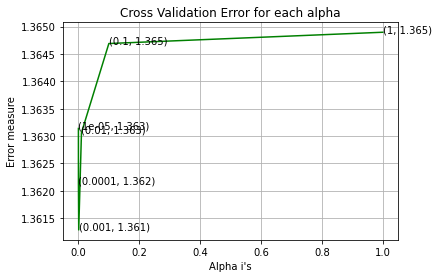

For values of best alpha =  0.001 The train log loss is: 1.362665440168302
For values of best alpha =  0.001 The cross validation log loss is: 1.361286375446604
For values of best alpha =  0.001 The test log loss is: 1.3622381404241777


In [ ]:
alpha = [10 ** x for x in range(-5, 1)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_Violations_onehotCoding, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_Violations_onehotCoding, y_train)
    predict_y = sig_clf.predict_proba(cv_Violations_onehotCoding)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_Violations_onehotCoding, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_Violations_onehotCoding, y_train)

predict_y = sig_clf.predict_proba(train_Violations_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_Violations_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_Violations_onehotCoding)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


In [ ]:
from scipy.sparse import hstack
X_train_hstacked_all_features_vectorized = hstack((train_standardScaler_Cabin_Temperature_kelvin, train_standardScaler_min_of_Numerical_column, train_standardScaler_max_of_Numerical_column, train_standardScaler_Std_dev_of_Numerical_column, train_standardScaler_Median_of_Numerical_column, train_standardScaler_Mean_of_Numerical_column, 
train_standardScaler_Total_Safety_Complaints, train_standardScaler_Safety_Score,train_standardScaler_Cabin_Temprature,train_standardScaler_Adverse_Weather_Metric,train_standardScaler_Max_Elevation,train_standardScaler_Turbulence_In_gforces,train_standardScaler_Control_Metric,
train_Accident_Type_Code_onehotCoding,train_Days_Since_Inspection_onehotCoding,train_Violations_onehotCoding))

print('X_train_hstacked_all_features_vectorized.shape is ', X_train_hstacked_all_features_vectorized.shape)

X_cv_hstacked_all_features_vectorized = hstack((cv_standardScaler_Cabin_Temperature_kelvin, cv_standardScaler_min_of_Numerical_column, cv_standardScaler_max_of_Numerical_column, cv_standardScaler_Std_dev_of_Numerical_column, cv_standardScaler_Median_of_Numerical_column, cv_standardScaler_Mean_of_Numerical_column, 
cv_standardScaler_Total_Safety_Complaints,cv_standardScaler_Safety_Score,cv_standardScaler_Cabin_Temprature,cv_standardScaler_Adverse_Weather_Metric,cv_standardScaler_Max_Elevation,cv_standardScaler_Turbulence_In_gforces,cv_standardScaler_Control_Metric,
cv_Accident_Type_Code_onehotCoding,cv_Days_Since_Inspection_onehotCoding,cv_Violations_onehotCoding))

print('X_cv_hstacked_all_features_vectorized.shape is ', X_cv_hstacked_all_features_vectorized.shape)

test_hstacked_all_features_vectorized = hstack((test_standardScaler_Cabin_Temperature_kelvin, test_standardScaler_min_of_Numerical_column, test_standardScaler_max_of_Numerical_column, test_standardScaler_Std_dev_of_Numerical_column, test_standardScaler_Median_of_Numerical_column, test_standardScaler_Mean_of_Numerical_column,
test_standardScaler_Total_Safety_Complaints, test_standardScaler_Safety_Score,test_standardScaler_Cabin_Temprature,test_standardScaler_Adverse_Weather_Metric,test_standardScaler_Max_Elevation,test_standardScaler_Turbulence_In_gforces,test_standardScaler_Control_Metric,
test_Accident_Type_Code_onehotCoding,test_Days_Since_Inspection_onehotCoding,test_Violations_onehotCoding))

print('test_hstacked_all_features_vectorized.shape is ', test_hstacked_all_features_vectorized.shape)

X_train_hstacked_all_features_vectorized.shape is  (6400, 41)
X_cv_hstacked_all_features_vectorized.shape is  (1600, 41)
test_hstacked_all_features_vectorized.shape is  (2000, 41)


<h1> Machine Learning Models</h1>

<h3>1. K Nearest Neighbour Classification</h3>

log_loss for k =  1 is 1.0464066447598688
log_loss for k =  3 is 0.9345546677423406
log_loss for k =  5 is 0.8979878991837712
log_loss for k =  7 is 0.8895081676079483
log_loss for k =  9 is 0.8769139107495392
log_loss for k =  11 is 0.8673101324231396
log_loss for k =  13 is 0.8698793012501272


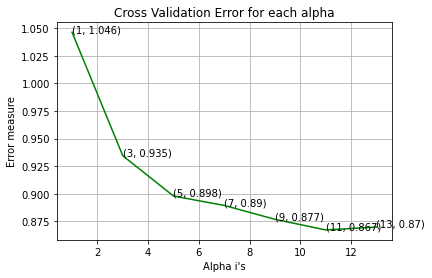

For values of best alpha =  11 The train log loss is: 0.7544984112412314
For values of best alpha =  11 The cross validation log loss is: 0.8673101324231396
For values of best alpha =  11 The test log loss is: 0.8781363974696487
Number of misclassified points  34.5
-------------------------------------------------- Confusion matrix --------------------------------------------------


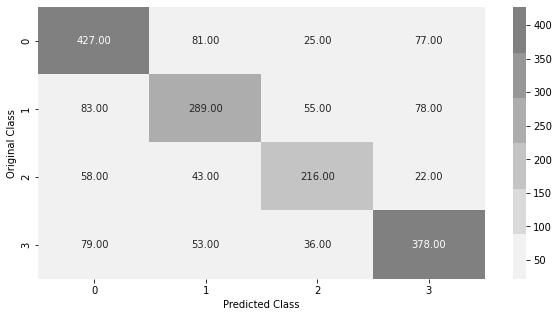

-------------------------------------------------- Precision matrix --------------------------------------------------


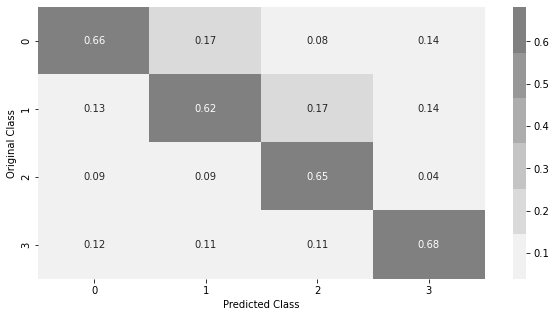

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


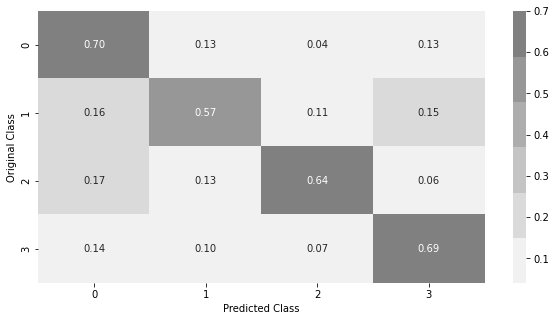

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#-------------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/k-nearest-neighbors-geometric-intuition-with-a-toy-example-1/
#-------------------------------------


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
  
alpha = [x for x in range(1, 15, 2)]
cv_log_error_array=[]
for i in alpha:
    k_cfl=KNeighborsClassifier(n_neighbors=i)
    k_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=k_cfl.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for k = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

k_cfl=KNeighborsClassifier(n_neighbors=alpha[best_alpha])
k_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(k_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    
predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of KNN model:

- Here we train our knn model on One Hot encoding + standard scaling, and we know knn model not work well on the high dimensional data point But in these case we seen our model work well as comapre to response coding KNN model .
- We use here knn model and calibrated model 
- knn use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- Here we do Cross validation to find the best hyperparameter(k).And best K = 11 where train loss = 0.7544 and cv loss = 0.8673 and test loss = 0.8781 
-  The missclassification point here 34.4%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix ,it give the good matrix .
- In precision , it work well.
- In recall it also work well. 


<h3>2. Logistic Regression</h3>

log_loss for c =  1e-05 is 1.2053410364362307
log_loss for c =  0.0001 is 1.1947393134013795
log_loss for c =  0.001 is 1.1410096616321648
log_loss for c =  0.01 is 1.0654140553182987
log_loss for c =  0.1 is 1.0296016128853862
log_loss for c =  1 is 1.023281638073623
log_loss for c =  10 is 1.0222864395254931
log_loss for c =  100 is 1.0219492635339062
log_loss for c =  1000 is 1.0219912431864895


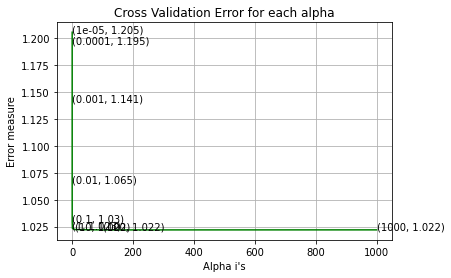

log loss for train data 1.019864363236334
log loss for cv data 1.0219492635339062
log loss for test data 1.0393832318509366
Number of misclassified points  38.45
-------------------------------------------------- Confusion matrix --------------------------------------------------


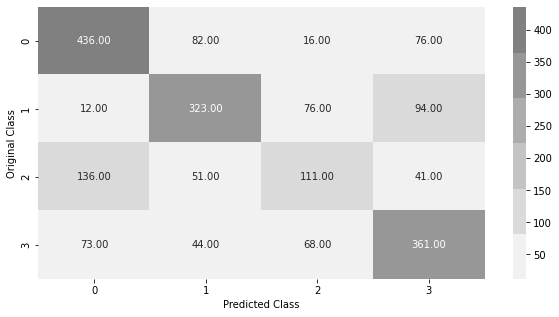

-------------------------------------------------- Precision matrix --------------------------------------------------


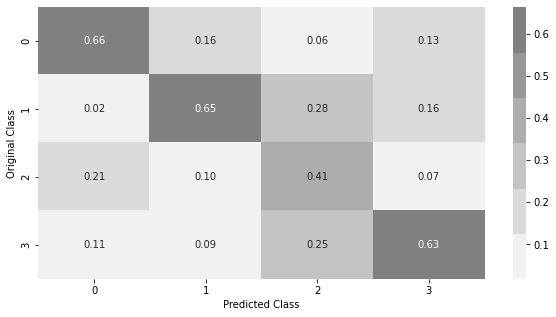

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


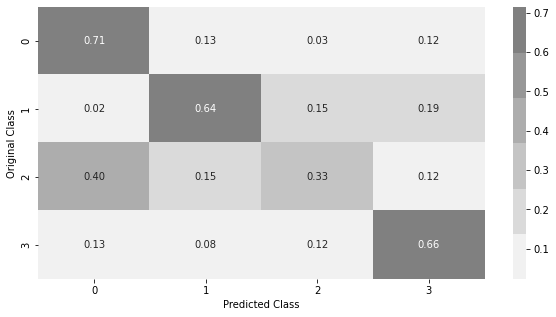

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------

alpha = [10 ** x for x in range(-5, 4)]
cv_log_error_array=[]
for i in alpha:
    logisticR=LogisticRegression(penalty='l2',C=i,class_weight='balanced')
    logisticR.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
    
for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])

best_alpha = np.argmin(cv_log_error_array)
    
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

logisticR=LogisticRegression(penalty='l2',C=alpha[best_alpha],class_weight='balanced')
logisticR.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(logisticR, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
pred_y=sig_clf.predict(test_hstacked_all_features_vectorized)

predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('log loss for train data',log_loss(y_train, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print ('log loss for cv data',log_loss(y_cv, predict_y, labels=logisticR.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print ('log loss for test data',log_loss(y_test, predict_y, labels=logisticR.classes_, eps=1e-15))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of Logistic model:

- Here we train our Logistic model on One Hot Encoding + standard scaling.
- We use here Logistic model and calibrated model 
- Logistic use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- Here best hyperparamter is c = 100
- Here our model give the  train loss = 1.0198 and cv loss = 1.0219 and test loss = 1.0393 
-  The missclassification point here 38.45%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix , we see it work well in the class 3 it won't give the good matrix.
- In precision , it work well.
- In recall it also work well. 


<h3> 3. Random Forest Classifier </h3>

log_loss for c =  10 is 0.5907321060950234
log_loss for c =  50 is 0.557957610408166
log_loss for c =  100 is 0.5555970404095724
log_loss for c =  500 is 0.5582644347268803
log_loss for c =  1000 is 0.5559886081141003
log_loss for c =  2000 is 0.5547418090362422
log_loss for c =  3000 is 0.5574953046166679


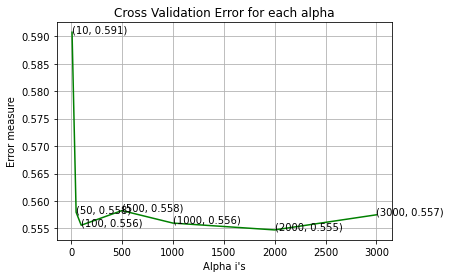

For values of best alpha =  2000 The train log loss is: 0.1402710707853463
For values of best alpha =  2000 The cross validation log loss is: 0.5547418090362422
For values of best alpha =  2000 The test log loss is: 0.5436732690777488
Number of misclassified points  20.349999999999998
-------------------------------------------------- Confusion matrix --------------------------------------------------


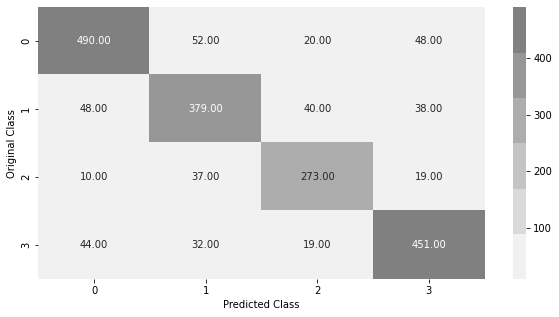

-------------------------------------------------- Precision matrix --------------------------------------------------


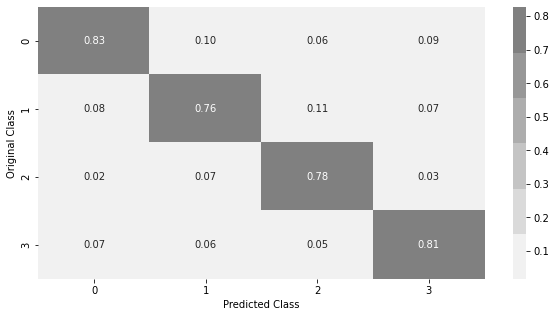

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


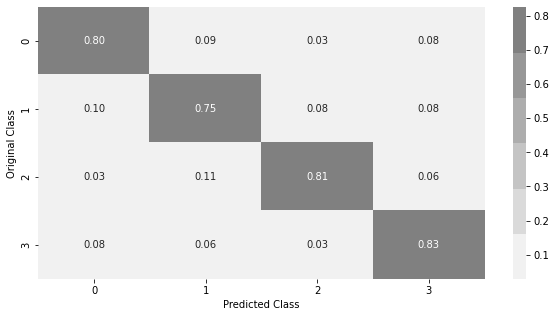

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/random-forest-and-their-construction-2/
# --------------------------------

alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
train_log_error_array=[]
from sklearn.ensemble import RandomForestClassifier
for i in alpha:
    r_cfl=RandomForestClassifier(n_estimators=i,random_state=42,n_jobs=-1)
    r_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=r_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


r_cfl=RandomForestClassifier(n_estimators=alpha[best_alpha],random_state=42,n_jobs=-1)
r_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(r_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)

predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of Random Forest model:

- Here we train our Random Forest model on One Hot Encoding + standard scaling.
- We use here Random forest model and calibrated model 
- Random use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- In the Random Forest here are number of hyperparameter but we only consider no_tree here which denoted by alpha and the best hyperparamter we get is alpha = 2000.
- Here our model give the  train loss = 0.1402 and cv loss = 0.5547 and test loss = 0.5436 
-  The missclassification point here 20.34%.
- As we seen Difference between the train and cv,test is slightly more as compare to other so chan ce of overfitting is more here.
- In the Confusion matrix , we see it work well and give the good matrix.
- In precision , it work well.
- In recall it also work well.


<h3>4. XgBoost Classification</h3>

100%|██████████| 6/6 [11:24<00:00, 114.04s/it]


log_loss for c =  10 is 0.4917801793011737
log_loss for c =  50 is 0.2709984565728095
log_loss for c =  100 is 0.24154978302921598
log_loss for c =  500 is 0.24969555966593718
log_loss for c =  1000 is 0.2603554234559395
log_loss for c =  2000 is 0.27015344378516565


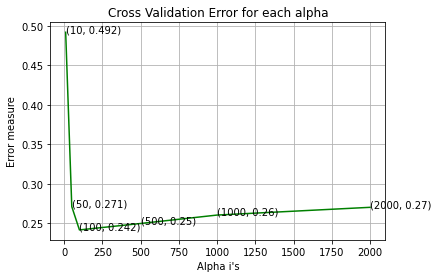

For values of best alpha =  100 The train log loss is: 0.0661982623259157
For values of best alpha =  100 The cross validation log loss is: 0.24154978302921598
For values of best alpha =  100 The test log loss is: 0.24134817372946157
Number of misclassified points  6.7
-------------------------------------------------- Confusion matrix --------------------------------------------------


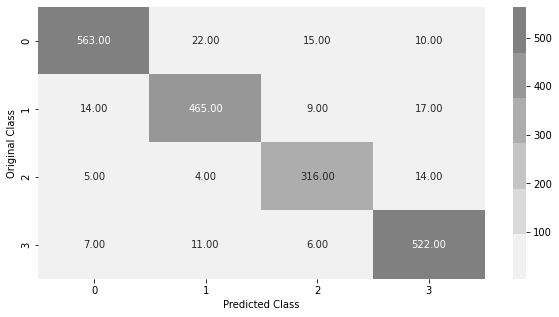

-------------------------------------------------- Precision matrix --------------------------------------------------


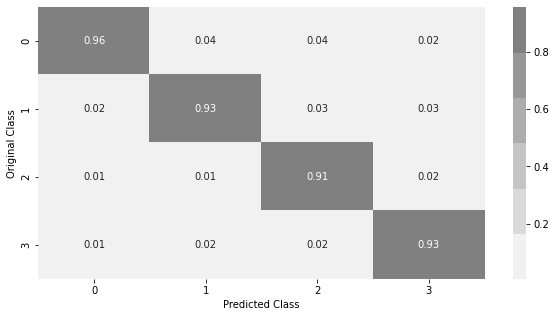

Sum of columns in precision matrix [1. 1. 1. 1.]
-------------------------------------------------- Recall matrix --------------------------------------------------


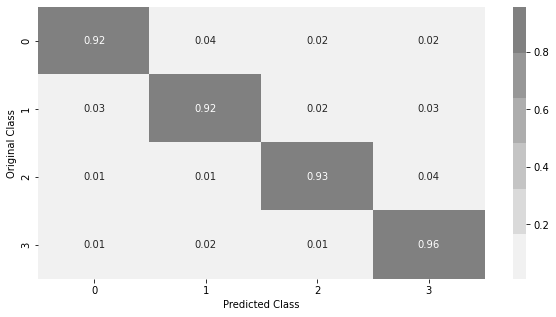

Sum of rows in precision matrix [1. 1. 1. 1.]


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

import xgboost as xgb
alpha=[10,50,100,500,1000,2000]
cv_log_error_array=[]
for i in tqdm(alpha):
    x_cfl=XGBClassifier(n_estimators=i,nthread=-1,eval_metric='mlogloss')
    x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=alpha[best_alpha],nthread=-1,eval_metric='mlogloss')
x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(X_train_hstacked_all_features_vectorized, y_train)
    
predict_y = sig_clf.predict_proba(X_train_hstacked_all_features_vectorized)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(X_cv_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_hstacked_all_features_vectorized)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))
plot_confusion_matrix(y_test, sig_clf.predict(test_hstacked_all_features_vectorized))

<h2> Observation of XGboost model:

- Here we train our XGboost model on One Hot encoding + standard scaling.
- We use here XGboost model and calibrated model 
- XGboost use to train the model and cabilrated is used to calculate the probability value Beacuse we want exact probability value.
- In the XGboost we have the n_estimator is the hyperparameter there are many hyperparameter in xgboost but we consider only n_estimaator here and the best hyperparamter we get is alpha = 100.
- Here our model give the  train loss = 0.0661 and cv loss = 0.2415 and test loss = 0.2413 
-  The missclassification point here 6.7%.
- As we seen the gap between the train and cv test is not much so that mean's the overfitting problem won't happend here.
- In the Confusion matrix ,In compare to other model it give best matrix.
- In precision , In compare to other model it give best matrix.
- In recall , In compare to other model it give best matrix.


<h3>4.1 XgBoost Classification with best hyper parameters using RandomSearch </h3>

In [ ]:
# https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
from sklearn.model_selection import RandomizedSearchCV
x_cfl=XGBClassifier()
prams={
    'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],
     'n_estimators':[100,200,500,1000,2000],
     'max_depth':[3,5,10],
    'colsample_bytree':[0.1,0.3,0.5,1],
    'subsample':[0.1,0.3,0.5,1]
}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(X_train_hstacked_all_features_vectorized,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[18:13:36] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           predictor=None, random_state=None,
                                           reg_alpha=None, reg_lambda=None,
                                           scal

In [ ]:
print (random_cfl1.best_params_)

{'subsample': 1, 'n_estimators': 2000, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1}


In [ ]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
# -----------------------

x_cfl=XGBClassifier(n_estimators=2000, learning_rate=0.1, colsample_bytree=1, max_depth=5,eval_metric='mlogloss')
x_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)
c_cfl=CalibratedClassifierCV(x_cfl,method='sigmoid')
c_cfl.fit(X_train_hstacked_all_features_vectorized,y_train)

predict_y = c_cfl.predict_proba(X_train_hstacked_all_features_vectorized)
print ('train loss',log_loss(y_train, predict_y))
predict_y = c_cfl.predict_proba(X_cv_hstacked_all_features_vectorized)
print ('cv loss',log_loss(y_cv, predict_y))
predict_y = c_cfl.predict_proba(test_hstacked_all_features_vectorized)
print ('test loss',log_loss(y_test, predict_y))

train loss 0.07121753940267107
cv loss 0.25353114023688655
test loss 0.24980526933622577


<h2> Obervation Of Best Hyperparameter Xgboost Model:

- In Xgboost we have number of hyperparameter so we do Hyperparameter tuning for them in this model.
- We train our model on response coding and Standard scaling.
- We train Xgboost model with best hyperparameter and the result we get is Train Loss = 0.0712 , cv loss = 0.2535 ,test loss = 0.2498.

<h1>Conclusions:

In [ ]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Train Loss","Cv Loss","Test Loss","Misclassification Point"]
x.add_row(["Response Enoding + StandardScaler", "KNN Model ", 1.0975, 1.1812, 1.1430,44.7])
x.add_row(["Response Enoding + StandardScaler", "Logistic Regression", 1.1522, 1.1692, 1.1344,43.30])
x.add_row(["Response Enoding + StandardScaler", "Random Forest", 1.0745, 1.1896, 1.1638,46.30])
x.add_row(["Response Enoding + StandardScaler", "Xgboost", 1.0945, 1.1635, 1.1166,43.00])
x.add_row(["Response Enoding + StandardScaler", "Xgboost With Hyperparameter",1.3673,1.3657, 1.3657,"NA"])


print(x)

+-----------------------------------+-----------------------------+------------+---------+-----------+-------------------------+
|             Vectorizer            |            Model            | Train Loss | Cv Loss | Test Loss | Misclassification Point |
+-----------------------------------+-----------------------------+------------+---------+-----------+-------------------------+
| Response Enoding + StandardScaler |          KNN Model          |   1.0975   |  1.1812 |   1.143   |           44.7          |
| Response Enoding + StandardScaler |     Logistic Regression     |   1.1522   |  1.1692 |   1.1344  |           43.3          |
| Response Enoding + StandardScaler |        Random Forest        |   1.0745   |  1.1896 |   1.1638  |           46.3          |
| Response Enoding + StandardScaler |           Xgboost           |   1.0945   |  1.1635 |   1.1166  |           43.0          |
| Response Enoding + StandardScaler | Xgboost With Hyperparameter |   1.3673   |  1.3657 |   1.36

In [ ]:
# Please compare all your models using Prettytable library
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Vectorizer", "Model", "Train Loss","Cv Loss","Test Loss","Misclassification Point"]
x.add_row(["One Hot Enoding + StandardScaler", "KNN Model ", 0.7544, 0.8673, 0.8781,34.5])
x.add_row(["One Hot Enoding + StandardScaler", "Logistic Regression", 1.0198, 1.0219, 1.0393,38.45])
x.add_row(["One Hot Enoding + StandardScaler", "Random Forest", 0.1402, 0.5547, 0.5436,20.34])
x.add_row(["One Hot Enoding + StandardScaler", "Xgboost", 0.0623, 0.2319, 0.2388,6.85])
x.add_row(["One Hot Enoding + StandardScaler", "Xgboost With Hyperparameter", 0.0712, 0.2535, 0.2498,"NA"])


print(x)

+----------------------------------+-----------------------------+------------+---------+-----------+-------------------------+
|            Vectorizer            |            Model            | Train Loss | Cv Loss | Test Loss | Misclassification Point |
+----------------------------------+-----------------------------+------------+---------+-----------+-------------------------+
| One Hot Enoding + StandardScaler |          KNN Model          |   0.7544   |  0.8673 |   0.8781  |           34.5          |
| One Hot Enoding + StandardScaler |     Logistic Regression     |   1.0198   |  1.0219 |   1.0393  |          38.45          |
| One Hot Enoding + StandardScaler |        Random Forest        |   0.1402   |  0.5547 |   0.5436  |          20.34          |
| One Hot Enoding + StandardScaler |           Xgboost           |   0.0623   |  0.2319 |   0.2388  |           6.85          |
| One Hot Enoding + StandardScaler | Xgboost With Hyperparameter |   0.0712   |  0.2535 |   0.2498  |   

<h2> Observation Of Conclusion:

- As we seen above conclusion we see that Xgboost performing very well on the Cv and test dataset and it misclassification point is also less as comapre to other it beacuse data set is might be not linearly sepeprable.
- In term of train dataset we see random forest perform very good as compare to other. 
- Logistic model is performing worst in comparing of all of model.

<h3>Selection Of model:

 So in term of selection of model we Can select Xgboost with One Hot Encoding + Standard Scaling  beacuse it give us best results and perfromance.

In [ ]:
# Save model on disk
pickle.dump(x_cfl, open('/content/drive/MyDrive/Case study/Xgboost_model.pkl', 'wb'))

In [ ]:
# save the scaler
from pickle import dump
pickle.dump(scalar, open('/content/drive/MyDrive/Case study/scaler.pkl', 'wb'))

In [ ]:
# save the encoder files
from pickle import dump
pickle.dump(encoder, open('/content/drive/MyDrive/Case study/encoder.pkl', 'wb'))
pickle.dump(encoder1, open('/content/drive/MyDrive/Case study/encoder1.pkl', 'wb'))
pickle.dump(encoder2, open('/content/drive/MyDrive/Case study/encoder2.pkl', 'wb'))